# La Réunion: download and plot with high resolution

In [48]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LightSource
from scipy.ndimage import gaussian_filter

import pycpt
from pygmrt.tiles import download_tiles

plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.bbox"] = "tight"
plt.rcParams["font.size"] = 12
plt.rcParams["font.sans-serif"] = "Arial"

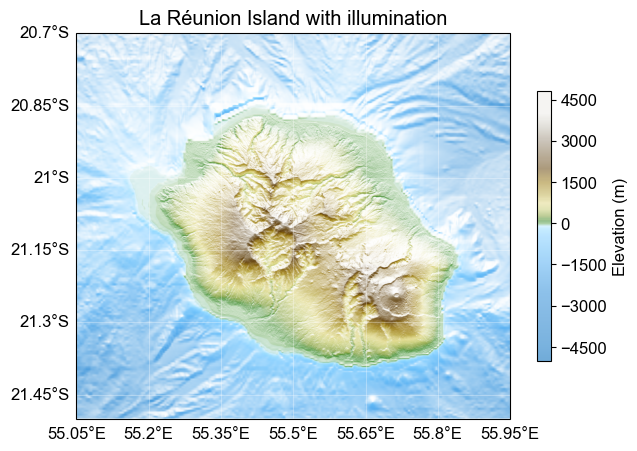

In [52]:
# La Réunion bbox [west, south, east, north]
bbox = [55.05, -21.5, 55.95, -20.7]

# Download
tiles = download_tiles(bbox=bbox, resolution="medium")

# Remove NaNs and smooth a bit for better visualization
topo = tiles.read(1)
topo[np.isnan(topo)] = 0
vmax = abs(topo).max()
bbox = tiles.bounds
extent = (bbox.left, bbox.right, bbox.bottom, bbox.top)
palette = pycpt.read("wiki-france")
palette.interpolate(256)

# Create figure
fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection=ccrs.PlateCarree())

# Hillshade
sun = LightSource(azdeg=0, altdeg=20)
shade = sun.shade(topo, cmap=palette.cmap, norm=palette.norm, vert_exag=0.1)
ax.imshow(shade, extent=extent, origin="upper", transform=ccrs.PlateCarree())

# Extra map features
palette.colorbar(ax=ax, label="Elevation (m)", shrink=0.5)
ax.set_extent(extent)
gridlines = ax.gridlines(draw_labels=True, color="white", alpha=0.3)
gridlines.top_labels = False
gridlines.right_labels = False
ax.set_title("La Réunion Island with illumination")

# Save figure
fig.savefig("02_playground_reunion.svg")

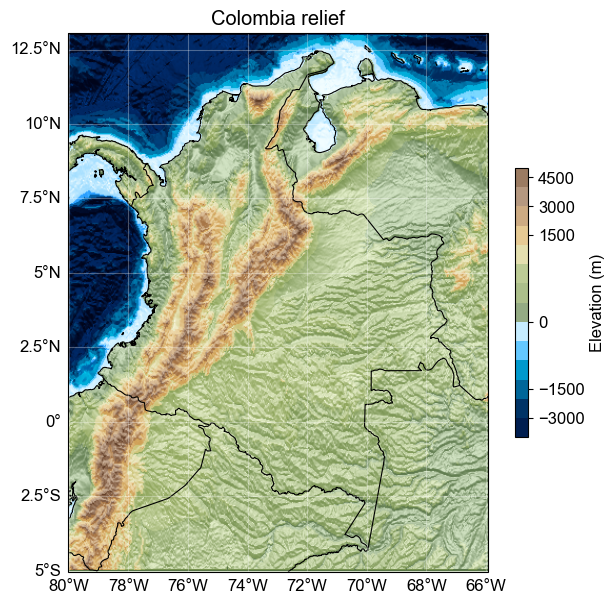

In [51]:
from cartopy import feature as cfeature

# Columbia bbox [west, south, east, north]
bbox = [-80.0, -5.0, -66.0, 13.0]

# Download
tiles = download_tiles(bbox=bbox, resolution="low")

# Remove NaNs and smooth a bit for better visualization
topo = tiles.read(1)
topo[np.isnan(topo)] = 0
vmax = abs(topo).max()
bbox = tiles.bounds
extent = (bbox.left, bbox.right, bbox.bottom, bbox.top)
palette = pycpt.read("colombia")

# Create figure
fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection=ccrs.PlateCarree())

# Hillshade
sun = LightSource(azdeg=0, altdeg=60)
shade = sun.shade(
    topo,
    cmap=palette.cmap,
    norm=palette.norm,
    vert_exag=0.5,
    blend_mode="soft",
)
ax.imshow(shade, extent=extent, origin="upper", transform=ccrs.PlateCarree())

# Extra map features
palette.colorbar(ax=ax, label="Elevation (m)", shrink=0.5)
ax.set_extent(extent)
ax.coastlines(color="k", linewidth=0.8)
ax.add_feature(cfeature.BORDERS, edgecolor="k", linewidth=0.8)
gridlines = ax.gridlines(draw_labels=True, color="white", alpha=0.3)
gridlines.top_labels = False
gridlines.right_labels = False
ax.set_title("Colombia relief")

# Save figure
fig.savefig("02_playground_colombia.svg")